Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from keras.utils import np_utils

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


Loading Train and Test data

In [2]:
train_df = pd.read_csv("/content/drive/My Drive/Data Science/Kaggle_mnist/train.csv")
print(train_df.shape)
train_df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv("/content/drive/My Drive/Data Science/Kaggle_mnist/test.csv")
print(test_df.shape)
test_df.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Preprocessing of Data

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64
 


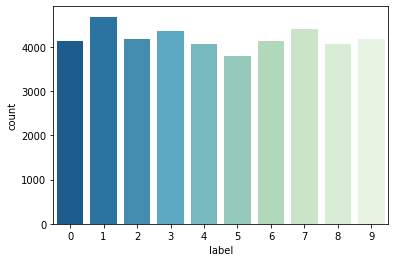

In [4]:
print(pd.value_counts(train_df['label']))
print(" ")

sns.countplot(x='label', data=train_df, palette='GnBu_r')

Splitting Train data into Features and Labels

In [5]:
X_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]

X_train.shape, y_train.shape

((42000, 784), (42000,))

Reshaping Features of Train and Test dataset

In [6]:
X_train = X_train.values.reshape(X_train.shape[0],28,28,1)

test_df = test_df.values.reshape(test_df.shape[0],28,28,1)

X_train.shape, test_df.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

Visualization of one image of Feature data

Label :  Text(0.5, 1.0, '0')


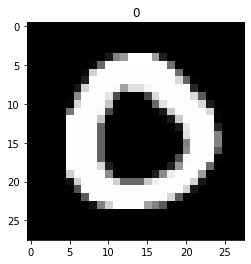

In [7]:
plt.imshow(np.squeeze(X_train[4]), cmap=plt.get_cmap('gray'))
print('Label : ', plt.title(label=y_train[4]))
plt.show()

Normalization of Train and Test features

In [0]:
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean)/std

In [0]:
mean = test_df.mean()
std = test_df.std()

test_df = (test_df - mean)/std

Conversion of Labels to categorical

In [10]:
y_train = np_utils.to_categorical(y_train, num_classes=10)

y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Building model with Sequential method

In [0]:
model = Sequential()

Adding Convolution layers with Dropout and Maxpooling layers

In [0]:
model.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=120, kernel_size=(2,2), strides=(1,1), activation='tanh'))

Flattening of Convolution Output

In [0]:
model.add(Flatten())

Building Neural Network

In [0]:
model.add(Dense(units=84, activation='tanh'))

model.add(Dense(units=10, activation='softmax'))

Summary of Model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 120)         7800      
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

Compiling of Model with RMSprop optimizer

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Fitting Model

In [17]:
history = model.fit(x=X_train, y=y_train, batch_size=200, epochs=10, validation_split=0.2)
history

Epoch 1/10
168/168 [==============================] - 1s 6ms/step - loss: 0.3559 - accuracy: 0.8941 - val_loss: 0.1995 - val_accuracy: 0.9404
Epoch 2/10
168/168 [==============================] - 1s 4ms/step - loss: 0.1715 - accuracy: 0.9496 - val_loss: 0.1290 - val_accuracy: 0.9619
Epoch 3/10
168/168 [==============================] - 1s 4ms/step - loss: 0.1084 - accuracy: 0.9677 - val_loss: 0.0921 - val_accuracy: 0.9723
Epoch 4/10
168/168 [==============================] - 1s 4ms/step - loss: 0.0762 - accuracy: 0.9770 - val_loss: 0.0681 - val_accuracy: 0.9801
Epoch 5/10
168/168 [==============================] - 1s 4ms/step - loss: 0.0579 - accuracy: 0.9829 - val_loss: 0.0653 - val_accuracy: 0.9787
Epoch 6/10
168/168 [==============================] - 1s 5ms/step - loss: 0.0462 - accuracy: 0.9865 - val_loss: 0.0616 - val_accuracy: 0.9811
Epoch 7/10
168/168 [==============================] - 1s 5ms/step - loss: 0.0387 - accuracy: 0.9884 - val_loss: 0.0470 - val_accuracy: 0.9863
Epoch 

Visualization of Loss and Accuracy of model

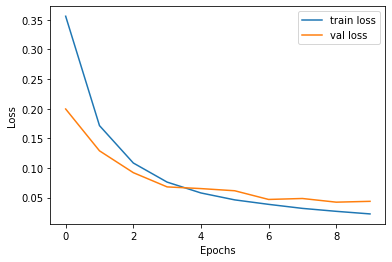

In [18]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

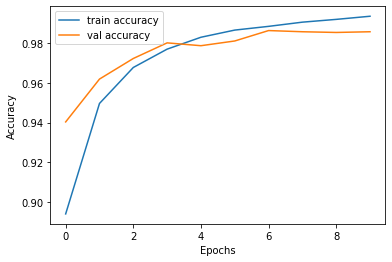

In [19]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Predicting model with Test dataset

In [20]:
test_df.shape

(28000, 28, 28, 1)

In [21]:
predict = model.predict_classes(test_df, verbose=1)

pred_df = pd.DataFrame({"ImageId": list(range(1,len(predict)+1)), "Label": predict})

pred_df.head()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
875/875 [==============================] - 1s 1ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [22]:
pred_df.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [0]:
pred_df.to_csv(path_or_buf="Kaggle_mnist.csv", index=False, header=True, )

In [24]:
model.save("/content/drive/My Drive/Data Science/Kaggle_mnist", save_format='tf', include_optimizer=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Data Science/Kaggle_mnist/assets
